In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds = pd.read_csv('insurance.csv')

In [3]:
ds.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
ds.describe()[['age', 'bmi', 'charges']]

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [6]:
ds.groupby('sex').mean()[['age', 'bmi', 'charges']]

,age,bmi,charges
sex,,,
female,39.503021,30.377749,12569.578844
male,38.917160,30.943129,13956.751178


In [7]:
ds.groupby('smoker').mean()[['age', 'bmi', 'charges']]

,age,bmi,charges
smoker,,,
no,39.385338,30.651795,8434.268298
yes,38.514599,30.708449,32050.231832


In [8]:
ds.groupby('region').mean()[['age', 'bmi', 'charges']]

,age,bmi,charges
region,,,
northeast,39.268519,29.173503,13406.384516
northwest,39.196923,29.199785,12417.575374
southeast,38.939560,33.355989,14735.411438
southwest,39.455385,30.596615,12346.937377


In [9]:
ds.corr()['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

In [10]:
ds = pd.get_dummies(ds, columns=['sex', 'smoker', 'region'], drop_first=True)

In [11]:
ds.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


<AxesSubplot:ylabel='charges'>

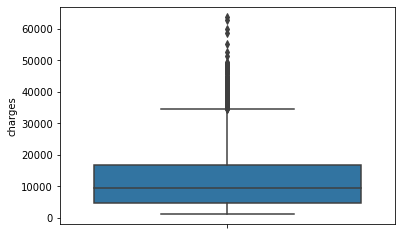

In [12]:
sns.boxplot(data=ds, y='charges')

In [13]:
outlier = 1.5*(16639-4740) + 13270

In [14]:
outlier

31118.5

In [15]:
ds = ds[ds['charges'] < outlier]

In [16]:
ds.describe()['charges']

count     1182.000000
mean      9589.166641
std       6714.690131
min       1121.873900
25%       4352.146712
50%       8279.072850
75%      12645.802500
max      30942.191800
Name: charges, dtype: float64

In [17]:
X = ds.drop(['charges', 'children'], axis=1)

In [18]:
y = ds['charges']

In [19]:
X.head()

,age,bmi,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1
1,18,33.770,1,0,0,1,0
2,28,33.000,1,0,0,1,0
3,33,22.705,1,0,1,0,0
4,32,28.880,1,0,1,0,0


In [20]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
train_rmse_erros = []
test_rmse_erros = []

for d in range(1,4):
    
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
   
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    X_train = scaler.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_erros.append(train_rmse)
    test_rmse_erros.append(test_rmse)

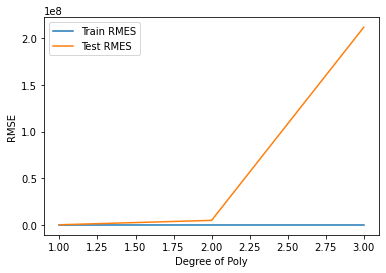

In [28]:
plt.plot(range(1,4),train_rmse_erros,label='Train RMES' )
plt.plot(range(1,4),test_rmse_erros,label='Test RMES' )
plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend();

In [89]:
polynomial_converter = PolynomialFeatures(degree=1, include_bias=False)

In [90]:
polynomial_converter.fit(X)

PolynomialFeatures(degree=1, include_bias=False)

In [91]:
poly_features = polynomial_converter.transform(X)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.1, random_state=101)

In [93]:
model = LinearRegression()

In [94]:
model.fit(X_train,y_train)

LinearRegression()

In [95]:
y_pred = model.predict(X_test)

In [96]:
MSE = mean_squared_error(y_test, y_pred)

In [97]:
RMSE = np.sqrt(MSE)

In [98]:
RMSE

2853.244809755808

In [99]:
residual = y_test - y_pred

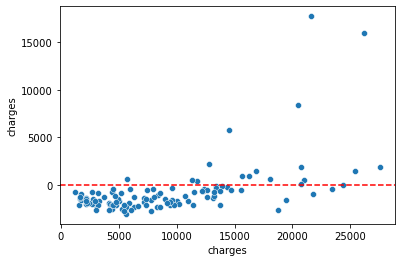

In [100]:
sns.scatterplot(x=y_test, y=residual)
plt.axhline(y=0, color='red', ls='--')

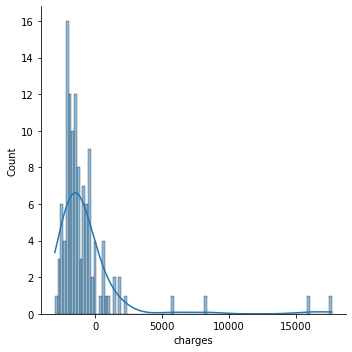

In [101]:
sns.displot(residual, bins=100, kde=True)

In [102]:
from sklearn.metrics import r2_score

In [103]:
r2_score(y_test, y_pred)

0.7914168927630887